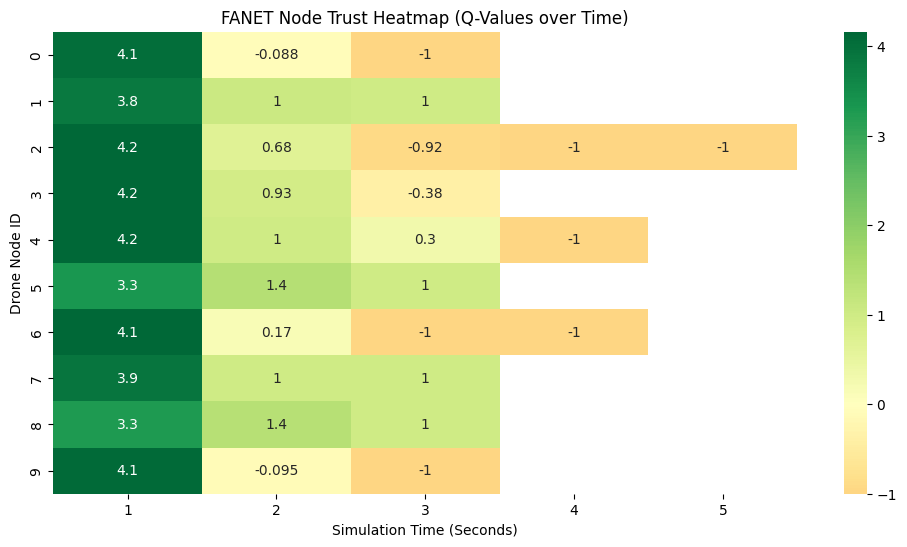

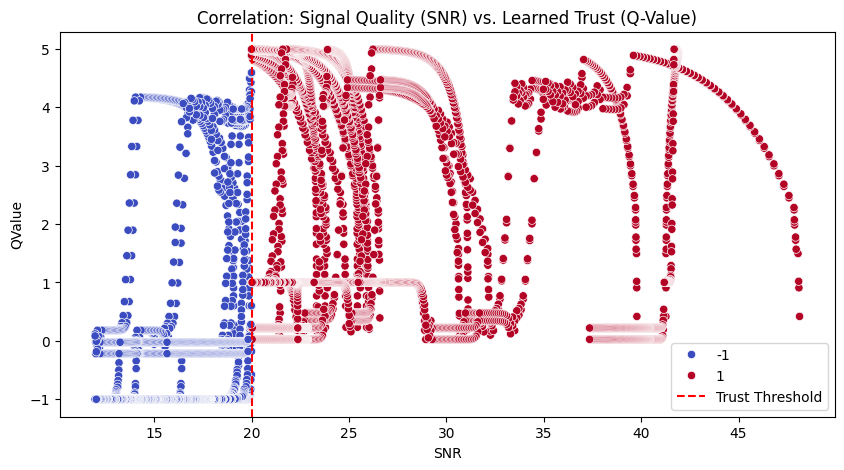

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the data
df = pd.read_csv('/content/fanet_telemetry_results.csv')

# 2. Round timestamps to the nearest second to group data for the heatmap
df['TimeStep'] = df['Timestamp'].round(0).astype(int)

# 3. Create Pivot Table for Heatmap (Nodes vs Time, showing average Q-Value)
# This shows how trust grows (or shrinks) for each node over time
pivot_table = df.pivot_table(index='NodeID', columns='TimeStep', values='QValue', aggfunc='mean')

# --- Visualization 1: Heatmap ---
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='RdYlGn', center=0)
plt.title('FANET Node Trust Heatmap (Q-Values over Time)')
plt.xlabel('Simulation Time (Seconds)')
plt.ylabel('Drone Node ID')
plt.show()

# --- Visualization 2: SNR vs Trust Correlation ---
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='SNR', y='QValue', hue='Reward', palette='coolwarm')
plt.axvline(x=20, color='red', linestyle='--', label='Trust Threshold')
plt.title('Correlation: Signal Quality (SNR) vs. Learned Trust (Q-Value)')
plt.legend()
plt.show()

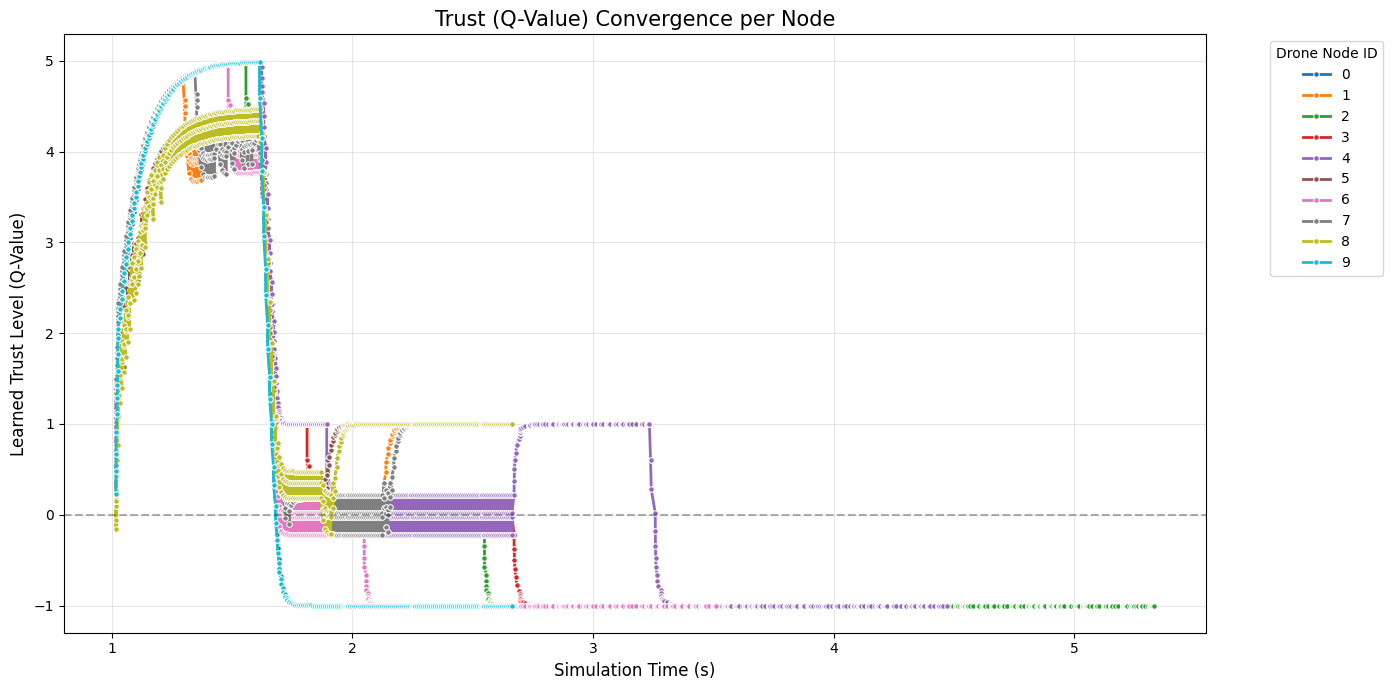

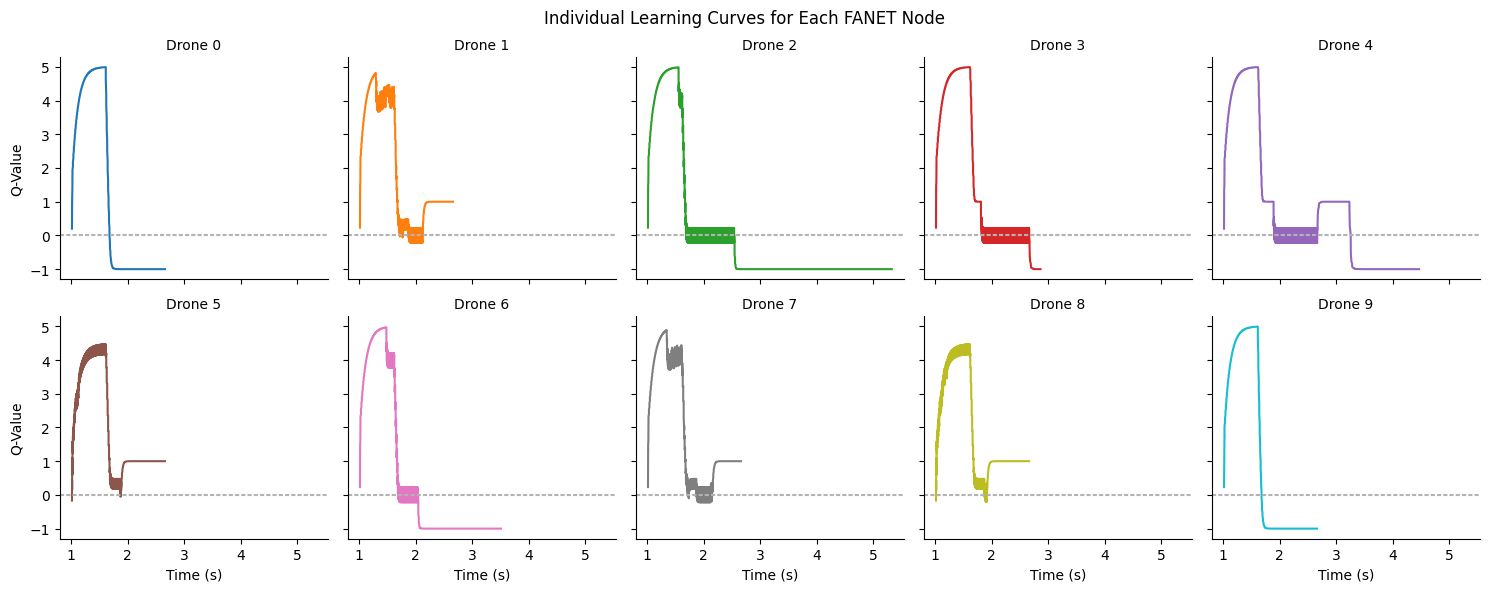

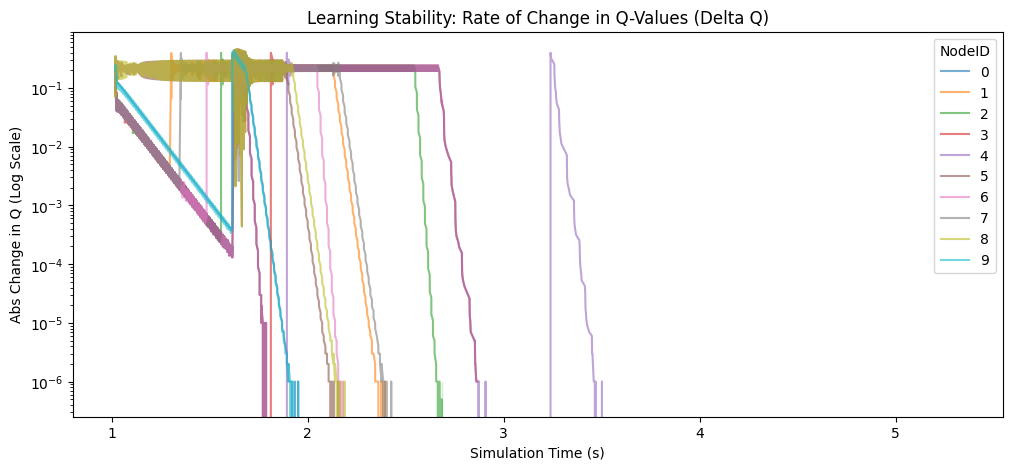

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load data
df = pd.read_csv('/content/fanet_telemetry_results.csv')

# 2. Sort by Node and Time to ensure smooth lines
df = df.sort_values(by=['NodeID', 'Timestamp'])

# 3. Visualization 1: Individual Trust Trends (The Equilibrium Plot)
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Timestamp', y='QValue', hue='NodeID',
             palette='tab10', linewidth=2, marker='o', markersize=4)

plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)
plt.title('Trust (Q-Value) Convergence per Node', fontsize=15)
plt.xlabel('Simulation Time (s)', fontsize=12)
plt.ylabel('Learned Trust Level (Q-Value)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Drone Node ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4. Visualization 2: Facet Grid (Separate graphs for each node)
# This is the "Cleanest" way to show supervisors the individual behavior
g = sns.FacetGrid(df, col="NodeID", col_wrap=5, hue="NodeID", palette="tab10")
g.map(sns.lineplot, "Timestamp", "QValue")
g.map(plt.axhline, y=0, color=".7", dashes=(2, 1))
g.set_axis_labels("Time (s)", "Q-Value")
g.set_titles("Drone {col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Individual Learning Curves for Each FANET Node')
plt.show()

# 5. Visualization 3: Convergence Rate (Delta Q)
# This proves the "Equilibrium" you mentioned
df['DeltaQ'] = df.groupby('NodeID')['QValue'].diff().abs()
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='Timestamp', y='DeltaQ', hue='NodeID', palette='tab10', alpha=0.6)
plt.yscale('log') # Log scale helps see small changes
plt.title('Learning Stability: Rate of Change in Q-Values (Delta Q)')
plt.ylabel('Abs Change in Q (Log Scale)')
plt.xlabel('Simulation Time (s)')
plt.show()